# Detecting Insults in Social Commentary

## 1. Business Understanding

### 1.1 Project Description


In the modern era, our reliance on digital platforms and social media has significantly increased. Yet, alongside the ease of online interactions comes the pressing need to manage and uphold civil discussions. This initiative seeks to tackle a crucial challenge: detecting and recognizing offensive remarks within social discourse.

This project is centered on the objective of pinpointing comments aimed at insulting or belittling individuals engaged in a conversation. Such comments might encompass vulgar language, derogatory terms, racially insensitive remarks, or other forms of disrespect. It's vital to emphasize that our focus is specifically on comments directed at discussion participants, rather than those targeting public figures or prominent personalities.

### 1.2 Project Objectives

**Project Objectives**

1. **Classifier Development:** The central aim is to construct a machine learning classifier capable of accurately determining if a given comment is insulting. This classifier's key function is to assign a probability score to each comment, indicating the likelihood of it containing an insult.

2. **Accuracy Priority:** Prioritize achieving high accuracy levels while minimizing instances of false positives and false negatives, ensuring a well-balanced model.

3. **Real-time Detection:** Develop a model that enables nearly instantaneous identification of insults within online conversations.

4. **Generalization:** Ensure the model can effectively recognize a wide range of insults, encompassing both explicit and subtle forms, ensuring its adaptability.

5. **Data Privacy:** Strictly adhere to robust data protection measures, utilizing comments solely for moderation purposes while ensuring user privacy.

6. **Scalable Solution:** Construct a system capable of efficiently processing large volumes of user-generated content, ensuring scalability.

7. **Ethical Compliance:** Address ethical concerns regarding potential biases and fairness in the insult detection system's functioning.

8. **Collaboration:** Collaborate closely with online platforms and communities for implementing and refining the insult detection system.



## 2. Data Understanding

To initiate the project, the first step involves analyzing the existing dataset. This process will involve creating dataframes using the required input files, conducting an exploratory analysis of the data, and providing comprehensive descriptions of all columns. Acquiring a thorough understanding of the dataset is crucial for the successful development of an efficient insult detection model.


### Importing Packages

In [1]:
import pandas as pd
import nltk                                # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from sklearn.base import BaseEstimator
import numpy as np
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize


### 2.1. Importing data

In [2]:
# Load the datasets
verification_set = pd.read_csv('C:/Users/achra/Desktop/insult detection/impermium_verification_set.csv')
verification_labels = pd.read_csv('C:/Users/achra/Desktop/insult detection/impermium_verification_labels.csv')
test = pd.read_csv('C:/Users/achra/Desktop/insult detection/test.csv')
test_with_solutions = pd.read_csv('C:/Users/achra/Desktop/insult detection/test_with_solutions.csv')
train = pd.read_csv('C:/Users/achra/Desktop/insult detection/train.csv')
sample_submission_null = pd.read_csv('C:/Users/achra/Desktop/insult detection/sample_submission_null.csv')



### 2.2. Data exploration
### 2.2.1 Columns description

#### **Verification Set**:
The dataset serves as a validation resource throughout the model development and testing phases.





In [3]:
# Print the first 10 rows of the verificationSet DataFrame
print("verification_set:")
print(verification_set.head(10))

verification_set:
   id  Insult             Date  \
0   1     NaN  20120603163526Z   
1   2     NaN  20120531215447Z   
2   3     NaN  20120823164228Z   
3   4     NaN  20120826010752Z   
4   5     NaN  20120602223825Z   
5   6     NaN  20120603202442Z   
6   7     NaN  20120603163604Z   
7   8     NaN  20120602223902Z   
8   9     NaN  20120528064125Z   
9  10     NaN  20120603071243Z   

                                             Comment        Usage  
0                 "like this if you are a tribe fan"  PrivateTest  
1              "you're idiot......................."  PrivateTest  
2  "I am a woman Babs, and the only "war on women...  PrivateTest  
3  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...  PrivateTest  
4  "haha green me red you now loser whos winning ...  PrivateTest  
5  "\nMe and God both hate-faggots.\n\nWhat's the...  PrivateTest  
6  "Oh go kiss the ass of a goat....and you DUMMY...  PrivateTest  
7                  "Not a chance Kid, you're wrong."  PrivateTe

#### **Verification Labels**:
In this dataset, the 'verification_set' includes labeled data where '0' signifies non-insulting comments, while '1' denotes insulting comments.


In [4]:
# Print the first 10 rows of the verification labels
print("verification_labels:")
print(verification_labels.head(10))

verification_labels:
   id  Insult             Date  \
0   1       0  20120603163526Z   
1   2       1  20120531215447Z   
2   3       1  20120823164228Z   
3   4       1  20120826010752Z   
4   5       1  20120602223825Z   
5   6       0  20120603202442Z   
6   7       1  20120603163604Z   
7   8       0  20120602223902Z   
8   9       0  20120528064125Z   
9  10       1  20120603071243Z   

                                             Comment        Usage  
0                 "like this if you are a tribe fan"  PrivateTest  
1              "you're idiot......................."  PrivateTest  
2  "I am a woman Babs, and the only "war on women...  PrivateTest  
3  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...  PrivateTest  
4  "haha green me red you now loser whos winning ...  PrivateTest  
5  "\nMe and God both hate-faggots.\n\nWhat's the...  PrivateTest  
6  "Oh go kiss the ass of a goat....and you DUMMY...  PrivateTest  
7                  "Not a chance Kid, you're wrong."  Privat

#### **Test**:
The primary test dataset is utilized for making predictions using the trained machine learning model.

In [5]:
# Print the first 10 rows of the test data frame
print("test:")
print(test.head(10))

test:
   id             Date                                            Comment
0   1  20120603163526Z                 "like this if you are a tribe fan"
1   2  20120531215447Z              "you're idiot......................."
2   3  20120823164228Z  "I am a woman Babs, and the only "war on women...
3   4  20120826010752Z  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...
4   5  20120602223825Z  "haha green me red you now loser whos winning ...
5   6  20120603202442Z  "\nMe and God both hate-faggots.\n\nWhat's the...
6   7  20120603163604Z  "Oh go kiss the ass of a goat....and you DUMMY...
7   8  20120602223902Z                  "Not a chance Kid, you're wrong."
8   9  20120528064125Z            "On Some real Shit FUck LIVE JASMIN!!!"
9  10  20120603071243Z  "ok but where the hell was it released?you all...


#### **Test with Solutions**
Much like the "test" dataset, this dataset contains the ground truth or accurate answers (solutions) for evaluation purposes. It's employed to assess the performance of the model once predictions have been generated.

In [6]:
# Print the first 10 rows of the test_with_solutions data frame
print("test_with_solutions:")
print(test_with_solutions.head(10))

test_with_solutions:
   Insult             Date                                            Comment  \
0       0              NaN  "THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...   
1       0  20120618222256Z  "@ian21\xa0"Roger Clemens is the fucking man, ...   
2       1  20120618213617Z  "Agree with Alan you are an extremest idiot.  ...   
3       0              NaN  "Really?\\n\\nI see Marc Lamont Hill on variou...   
4       0  20120620003825Z  "Really suck isn't the word, when many of our ...   
5       0              NaN  "...after a couple guys like him rape him firs...   
6       0  20120529201500Z   "Matthews mentored Perry at USC.  Bodes well..."   
7       0  20120619145613Z  "How about we accept facts and patiently wait ...   
8       1  20120609165037Z  "To engage in an intelligent debate with you i...   
9       0  20120612145537Z  "Same reason no one cared Obama did cocaine, w...   

         Usage  
0   PublicTest  
1   PublicTest  
2   PublicTest  
3  PrivateTest  
4 

#### **Train**:
The training dataset is utilized to train the machine learning model specifically for insult detection. It comprises labeled data, including comments with known insult labels, essential for developing and training the insult detection model.

In [7]:
# Print the first 10 rows of the train data frame
print("train:")
print(train.head(10))

train:
   Insult             Date                                            Comment
0       1  20120618192155Z                               "You fuck your dad."
1       0  20120528192215Z  "i really don't understand your point.\xa0 It ...
2       0              NaN  "A\\xc2\\xa0majority of Canadians can and has ...
3       0              NaN  "listen if you dont wanna get married to a man...
4       0  20120619094753Z  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...
5       0  20120620171226Z  "@SDL OK, but I would hope they'd sign him to ...
6       0  20120503012628Z                      "Yeah and where are you now?"
7       1              NaN  "shut the fuck up. you and the rest of your fa...
8       1  20120502173553Z  "Either you are fake or extremely stupid...may...
9       1  20120620160512Z  "That you are an idiot who understands neither...


## 3. Data preparation and pre-processing

We extract comments and its labels into one dataframe.

In [8]:
comments = train[['Insult', 'Comment']].copy()
print(comments)

      Insult                                            Comment
0          1                               "You fuck your dad."
1          0  "i really don't understand your point.\xa0 It ...
2          0  "A\\xc2\\xa0majority of Canadians can and has ...
3          0  "listen if you dont wanna get married to a man...
4          0  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...
...      ...                                                ...
3942       1  "you are both morons and that is never happening"
3943       0  "Many toolbars include spell check, like Yahoo...
3944       0  "@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F...
3945       0  "How about Felix? He is sure turning into one ...
3946       0  "You're all upset, defending this hipster band...

[3947 rows x 2 columns]


In [9]:
print(len(comments))



3947


### 3.1. Data cleaning

Following this, we'll create a text preprocessing function that will be employed to process the comment text.

# Remove hyperlinks, Twitter marks and styles

In [10]:
# Printing comments containing specific characters like '@' and 'https' to take as a sample
print(comments[comments['Comment'].str.contains('@|https', case=False)])


      Insult                                            Comment
5          0  "@SDL OK, but I would hope they'd sign him to ...
10         0  "@jdstorm dont wish him injury but it happened...
12         0       "@tonnyb  Or they just don't pay attention "
14         0  "@barrettmarson Huh? Her income was $21,912. H...
20         0  "@EephusBlue\xa0Makes you want to say "Mike Ma...
...      ...                                                ...
3923       0                    "@mikieboy - In a nutshell :-)"
3924       1  "@Crissa:disqus LaRaza (The Race), NBP. Nation...
3933       0  "@Ritual Reality No I am simply saying that ba...
3941       0  "@Sara Besleaga Griji, doruri sau dorin\\xc8\\...
3944       0  "@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F...

[270 rows x 2 columns]


In [11]:
# We take a sample comment
comment = comments['Comment'][1078]
print(comment)

"@berethor099 Go ahead and try, dude. Go - fucking - ahead."


In [12]:
# We download the stopwords from Natural Language Toolkit

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
print('\033[92m' + comment)
print('\033[94m')

# remove the "" from the end and start of the sentences
comment1 = comment.strip('"')

# remove hyperlinks
comment1 = re.sub(r'https?://[^\s\n\r]+', '', comment1)

# only removing the hash # sign from the word
comment1 = re.sub(r'#', '', comment1)

print(comment1)

"@berethor099 Go ahead and try, dude. Go - fucking - ahead."

@berethor099 Go ahead and try, dude. Go - fucking - ahead.


Remove unwanted characters, replace certain words and phrases

In [14]:
def preprocessing(sentence):
    cleanr = re.compile('<.*?>')

    regex = "[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
    regex1 = "(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][" \
             "a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2," \
             "}|www\.[a-zA-Z0-9]\.[^\s]{2,}) "
    regex2 = "(www | http: | https:)+[ ^\s]+[\w]"
    regex3 = r'\b\w*\d+\w*\b'
    s0 = sentence

    s0 = s0.lower()
    s0 = s0.replace("\\\\n", " ")
    s0 = s0.replace("\\n", " ")
    s0 = s0.replace("\\t", " ")
    s0 = s0.replace("\\\\xc2", " ")
    s0 = s0.replace("\\\\xa0", " ")
    s0 = s0.replace("\\\\xa0", " ")
    s0 = s0.replace("\\[\\w]", ' ')
    s0 = re.sub(r"\\[a-zA-Z0-9.]*", "", s0)

    s0 = re.sub("([a-zA-Z0-9.?!#*])\\1\\1+", "\\1", s0)  # brooooook->brook

    s0 = re.sub(regex, "", s0)  # url
    s0 = re.sub(r'http\S+|www\S+', '', s0)
    s0 = re.sub(regex1, "", s0)
    s0 = re.sub(cleanr, '', s0)  # html tags
    # Use re.sub to replace matched usernames with an empty string
    s0 = re.sub(regex3, "", s0)  # username

    # string = ":-/)"
    # ##  REMOVING SMILEYS
    # s0=re.sub(string,"  smiley",s0);
    # # s0=re.sub("\[\]+","",s0)            #remove \
    s0 = s0.strip()
    s0 = s0.replace(" wont ", " will not ")
    s0 = s0.replace(" won't ", " will not ")
    s0 = s0.replace(" don't ", " do not ")
    s0 = s0.replace(" didn't ", " did not ")
    s0 = s0.replace("Didn't ", "Did not ")
    s0 = s0.replace(" i'll", " I will")
    s0 = s0.replace(" I'll", " I will")
    s0 = s0.replace("I'll", "I will")
    s0 = s0.replace(" can't", " cannot")
    s0 = s0.replace(" shouldn't", " should not")
    s0 = s0.replace(" im ", " i am ")
    s0 = s0.replace("ain't", "is not")
    s0 = s0.replace("'ll", " will")
    s0 = s0.replace("'t[. ]", " not")
    s0 = s0.replace(" u ", " you ")
    s0 = s0.replace(" r ", " are ")
    s0 = s0.replace(" m ", " am ")
    s0 = s0.replace(" u'r ", " you are ")
    s0 = s0.replace(" you'r ", "you are ")
    s0 = s0.replace("'ve", " have")
    s0 = s0.replace("'s", " is")
    s0 = s0.replace("'re", " are")
    s0 = s0.replace("'d", " would")
    s0 = s0.replace("rly", " really")
    s0 = s0.replace(" fu ", " fuck you")
    s0 = re.sub("([a-zA-Z0-9.]+)\\1\\1+", " ", s0)  # lolololol->lol
    s0 = re.sub("[&*?!#^%`~$@]{4}", "-TOKEN-", s0)  # &*$!^@->>>>token
    s0 = s0.strip()
    s0 = re.sub(r'[@#][\w.]*', "-PRON-", s0)  # @username with YOU

    
    return s0

# Tokenize the string

In [15]:
print('\033[92m' + comment1)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
comment_tokens = tokenizer.tokenize(comment1)

print('Tokenized string:')
print(comment_tokens)

@berethor099 Go ahead and try, dude. Go - fucking - ahead.

Tokenized string:
['go', 'ahead', 'and', 'try', ',', 'dude', '.', 'go', '-', 'fucking', '-', 'ahead', '.']


# Remove stop words and punctuations

In [16]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We might need to customize the stop words list for our applications. Since the model should diffrenciate between insults to users of the forum and others.

In [17]:
print('\033[92m')
print(comment_tokens)
print('\033[94m')
comment_clean = []

for word in comment_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        comment_clean.append(word)

print('Removed stop words and punctuation:')
print()
print(comment_clean)


['go', 'ahead', 'and', 'try', ',', 'dude', '.', 'go', '-', 'fucking', '-', 'ahead', '.']

Removed stop words and punctuation:

['go', 'ahead', 'try', 'dude', 'go', 'fucking', 'ahead']


# Stemming
Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

In [18]:
print('\033[92m')
print(comment_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
comment_stem = []

for word in comment_clean:
    stem_word = stemmer.stem(word)  # stemming word
    comment_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(comment_stem)


['go', 'ahead', 'try', 'dude', 'go', 'fucking', 'ahead']

stemmed words:
['go', 'ahead', 'tri', 'dude', 'go', 'fuck', 'ahead']



Now we will create the process_comment() function that sums all the steps mentioned in the previous steps

In [19]:
def process_comment(df):
    # Iterate through the 'Comment' column in the DataFrame
    for index, row in df.iterrows():
        comment = row['Comment']
        comment1 = preprocessing(comment)  # Apply your preprocessing function to the comment
        comment1 = comment1.strip('"')
        comment_tokens = tokenizer.tokenize(comment1)
        comment_clean = []

        for word in comment_tokens:
            if (word not in stopwords_english and
                    word not in string.punctuation):
                comment_clean.append(word)

        comment_stem = []

        for word in comment_clean:
            stem_word = stemmer.stem(word)
            comment_stem.append(stem_word)

        # Overwrite the 'Comment' column in the DataFrame with the processed comment
        df.at[index, 'Comment'] = ' '.join(comment_stem)

    return df


Let's test our function


In [20]:
# Create a new DataFrame to store the preprocessed comments
preprocessed_comments = comments.copy()

# Call the process_comment function to preprocess the comments in 'preprocessed_comments' DataFrame
preprocessed_comments = process_comment(preprocessed_comments)

comments = train[['Insult', 'Comment']].copy()


In [21]:
print(preprocessed_comments)
print(comments)

      Insult                                            Comment
0          1                                           fuck dad
1          0        realli understand point seem mix appl orang
2          0  major canadian wrong unless support idea noth ...
3          0  listen dont wanna get marri man women dont wou...
4          0  c b xu bi c ho kh c ng ng cu chi nh c ho kh c ...
...      ...                                                ...
3942       1                                 moron never happen
3943       0  mani toolbar includ spell check like yahoo exa...
3944       0  pron--pron sioux fall told boy call around tod...
3945       0  felix sure turn one hell start pitcher think g...
3946       0  upset defend hipster band.and douch read news ...

[3947 rows x 2 columns]
      Insult                                            Comment
0          1                               "You fuck your dad."
1          0  "i really don't understand your point.\xa0 It ...
2          0  "

### 3.2. Data visualization

Here we will compare between two random rows before and after pre-processing

In [22]:
from tabulate import tabulate

# Select the same two comments from the original and preprocessed DataFrames
original_comments_to_compare = [comments['Comment'].iloc[17], comments['Comment'].iloc[1000]]
preprocessed_comments_to_compare = [preprocessed_comments['Comment'].iloc[17], preprocessed_comments['Comment'].iloc[1000]]

# Create a DataFrame to display the comments
comparison_data = {'Original Comments': original_comments_to_compare, 'Preprocessed Comments': preprocessed_comments_to_compare}
comparison_df = pd.DataFrame(comparison_data)

# Display the DataFrame as a table
print(tabulate(comparison_df, headers='keys', tablefmt='pretty'))


+---+---------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------+
|   |                                               Original Comments                                               |                       Preprocessed Comments                       |
+---+---------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------+
| 0 | "Oh! & cheating as well...1966 cup was a cheat fest, & you still dare to post that comment..shame on you lol" | oh cheat well cup cheat fest still dare post comment .. shame lol |
| 1 |                                  "Looks like there's fixin to be a shootout"                                  |                     look like fixin shootout                      |
+---+-----------------------------------------------------------------

Then, we plot a comparison between a sample of 30 comments before and after pre-processing

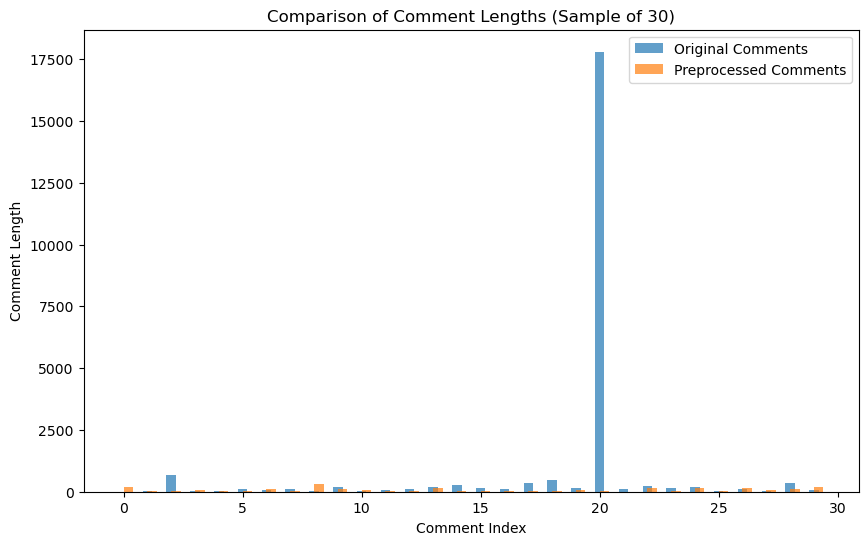

In [23]:
import matplotlib.pyplot as plt
import random

# Sample 30 comments from the original and preprocessed DataFrames
sample_size = 30
original_sample = random.sample(comments['Comment'].tolist(), sample_size)
preprocessed_sample = random.sample(preprocessed_comments['Comment'].tolist(), sample_size)

# Calculate the length of each comment in the samples
original_comment_lengths = [len(comment) for comment in original_sample]
preprocessed_comment_lengths = [len(comment) for comment in preprocessed_sample]

# Create a bar chart to compare comment lengths
plt.figure(figsize=(10, 6))
plt.bar(range(sample_size), original_comment_lengths, width=0.4, label='Original Comments', align='center', alpha=0.7)
plt.bar(range(sample_size), preprocessed_comment_lengths, width=0.4, label='Preprocessed Comments', align='edge', alpha=0.7)
plt.xlabel('Comment Index')
plt.ylabel('Comment Length')
plt.title('Comparison of Comment Lengths (Sample of 30)')
plt.legend()
plt.show()


We generate a word cloud to visualize the most frequent words

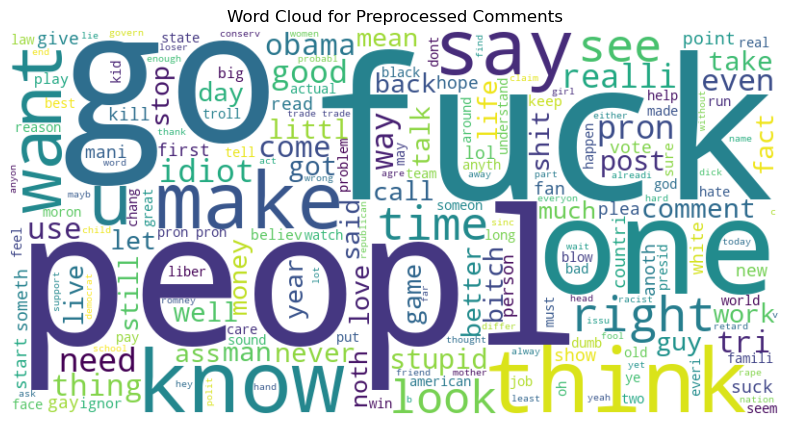

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all preprocessed comments into a single text
preprocessed_text = ' '.join(preprocessed_comments['Comment'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Preprocessed Comments')
plt.show()


### 3.3. Feature selection

Here we will use a transformer and a pretrained model "bert-base-uncased"

**Feature extraction using BERT**

This code is commented because we did save the features and there is no need to run it again. It takes too long to execute.

In [25]:
# from transformers import TFBertModel, BertTokenizer
# import tensorflow as tf
# import pandas as pd

# # Load your preprocessed_comments DataFrame
# # preprocessed_comments = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with your actual data file

# # Load the BERT model and tokenizer
# model_name = "bert-base-uncased"
#model = TFBertModel.from_pretrained(model_name)
# tokenizer = BertTokenizer.from_pretrained(model_name)

# # Tokenize your text data
# max_len = 128  # Set your desired maximum sequence length
# tokenized_comments = preprocessed_comments['Comment'].tolist()  # Convert to a list of strings

# # Pad the sequences to the fixed length
# features = []
# for text in tokenized_comments:
#     inputs = tokenizer(text, return_tensors="tf", padding='max_length', max_length=max_len, truncation=True)
#     outputs = model(**inputs)
#     feature_vector = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy().squeeze()
#     features.append(feature_vector)

# features = tf.stack(features)





In [26]:
# Load the test dataset
test_data = pd.read_csv("C:/Users/achra/Desktop/insult detection/impermium_verification_labels.csv")

# Apply the preprocess_comment function to the 'Comment' column in the verification dataset
verification_comment = test_data[['Insult', 'Comment']].copy()
processed_verification_comment = process_comment(verification_comment)

**Extract features from the verification set**

The code is commented because the we did run the code and saved the features, so there is no need to run it again.

In [27]:
# # Load your verification dataset
# verification_data = pd.read_csv('dataset/impermium_verification_labels.csv')

# # Preprocess the verification data (tokenization, padding, etc.)
# max_len = 128  # Set your desired maximum sequence length
# verification_comments = verification_data['Comment'].tolist()

# # Convert the tokenized verification data to BERT features
# verification_features = []
# for text in verification_comments:
#     inputs = tokenizer(text, return_tensors="tf", padding='max_length', max_length=max_len, truncation=True)
#     outputs = model(**inputs)
#     feature_vector = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy().squeeze()
#     verification_features.append(feature_vector)

# verification_features = tf.stack(verification_features)
